<a href="https://colab.research.google.com/github/lblogan14/opencv3_with_python/blob/master/ch5_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My' 'Drive/Colab' 'Notebooks/OpenCV3_with_Python_by_Example/data/ch5/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/OpenCV3_with_Python_by_Example/data/ch5


The following installations are necessary because the newest OpenCV has some issue with xfeatures2d module.

In [2]:
!pip3 uninstall opencv-python
!pip3 uninstall opencv-contrib-python
!pip3 install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cv2.__version__

Uninstalling opencv-python-3.4.3.18:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.3.18.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.3.18
Skipping opencv-contrib-python as it is not installed.
    100% |████████████████████████████████| 15.5MB 2.9MB/s 
    100% |████████████████████████████████| 21.4MB 1.5MB/s 


'3.3.0'

#Detect the corners
**Harris Corner Detector** allows us to construct a 2x2 matrix based on partial derivatives of the grayscale image, and then analyze the eigenvalues obtained. A corner point is a point where both
the eigenvalues would have large values.

In [0]:
img = cv2.imread('box.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Text(0.5,1,'Original Image')

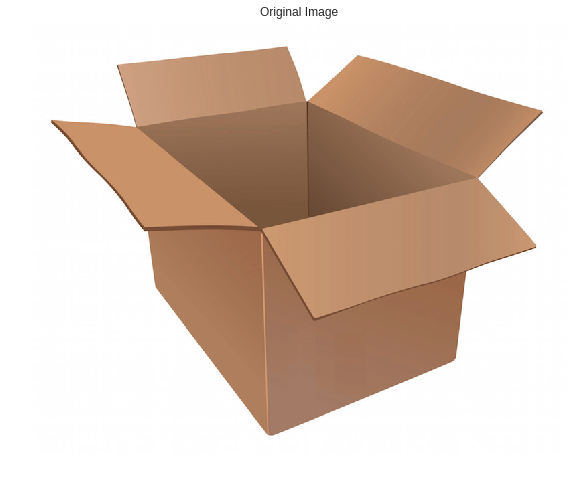

In [0]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img)
plt.title('Original Image')

In [0]:
# detect only sharp corners
dst = cv2.cornerHarris(gray, 
                       blockSize=4,
                       ksize=5,
                       k=0.04)

# result is dilated to mark the corners
dst = cv2.dilate(dst, None)

Text(0.5,1,'Harris Corners (only sharp)')

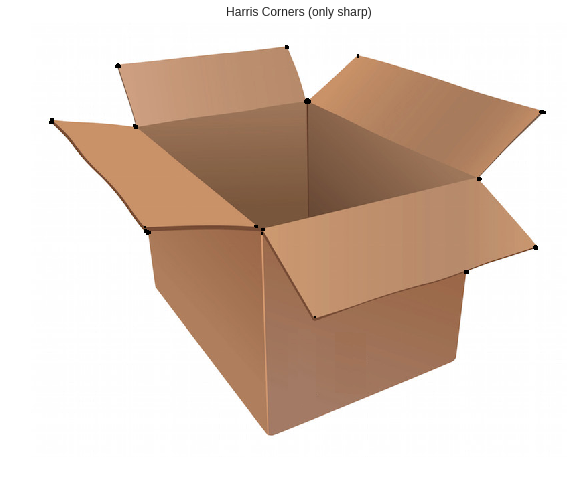

In [0]:

# threshold for an optimal value, it may vary depending on the image
img[dst > 0.01*dst.max()] = [0, 0, 0]

plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img)
plt.title('Harris Corners (only sharp)')

The corners at the bottom of the box are not detected because the corners there are not sharp enough. You can adjust the thresholds in the corner detector to
identify these corners.

Text(0.5,1,'Harris Corners (also soft)')

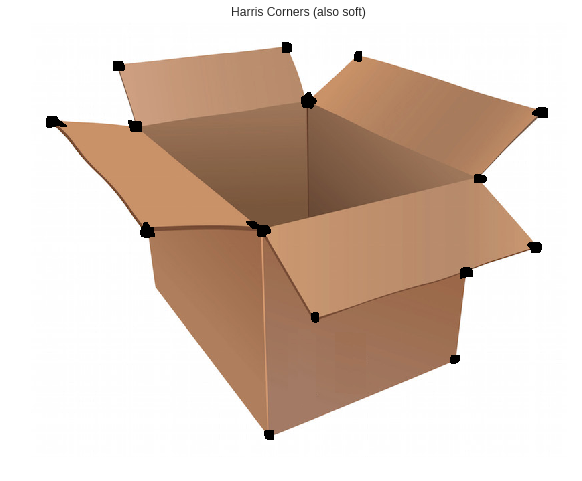

In [0]:
# detect soft corners
dst = cv2.cornerHarris(gray, 
                       blockSize=14, 
                       ksize=5,
                       k=0.04)
dst = cv2.dilate(dst, None)
img[dst > 0.01*dst.max()] = [0,0,0]
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(img)
plt.title('Harris Corners (also soft)')

#Good features to track
The following method finds the N strongest corners in the given image.

In [0]:
img = cv2.imread('box.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

corners = cv2.goodFeaturesToTrack(gray, 
                                  maxCorners=7, 
                                  qualityLevel=0.05,
                                  minDistance=25)
corners = np.float32(corners)

Text(0.5,1,"Top 'k' features")

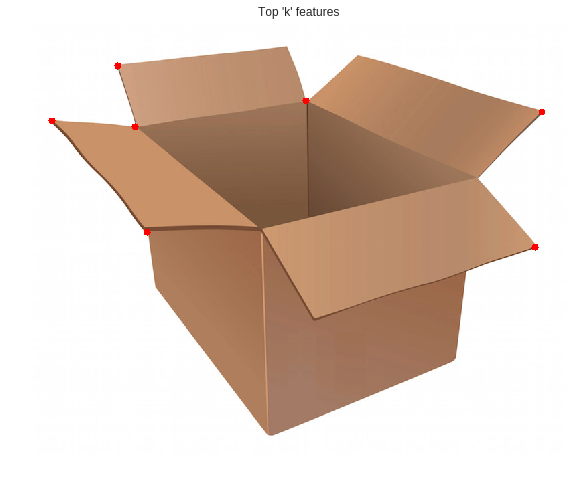

In [0]:
plt.figure(figsize=(10,8))
plt.axis('off')
for item in corners:
  x, y = item[0]
  cv2.circle(img, (x,y), 5, 255, -1)
  
plt.imshow(img)
plt.title('Top \'k\' features')

#Scale-invariant feature transform (SIFT)
When it comes to image content analysis, the image signature should be invariant to scale, rotaion and illumination.

SIFT is used to extract keypoints and build the corresponding feature descriptors.  

* **Scale-invariant**: to identify a potential keypoint, SIFT builds a pyramid by downsampling
an image and taking the difference of Gaussian. This means that we run a Gaussian filter at
each level and take the difference to build the successive levels in the pyramid. In order to
see if the current point is a keypoint, it looks at the neighbors as well as the pixels at the
same location in neighboring levels of the pyramid. If it's a maximum, then the current
point is picked up as a keypoint. This ensures that we keep the keypoints scale-invariant.

* **Rotation-invariant**: once we identify the keypoints, each keypoint is assigned an orientation. We
take the neighborhood around each keypoint and compute the gradient magnitude and
direction. This gives us a sense of the direction of that keypoint. If we have this information,
we will be able to match this keypoint to the same point in another image even if it's
rotated. Since we know the orientation, we will be able to normalize those keypoints before
making the comparisons

Once we obtained all the keypoints and their orientations, we need to convert them to a set of numbers to match them. To do this, we take the 16x16 neighborhood around each keypoint, and divide it into 16 blocks of size 4x4. For each
block, we compute the orientation histogram with eight bins. So, we have a vector of length
eight associated with each block, which means that the neighborhood is represented by a
vector of size 128 (8x16). This is the final keypoint descriptor that will be used. If we extract
N keypoints from an image, then we will have N descriptors each of length 128. This array
of N descriptors characterizes the given image.

In [0]:
input_image = cv2.imread('fishing_house.jpg')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

Text(0.5,1,'Original Image')

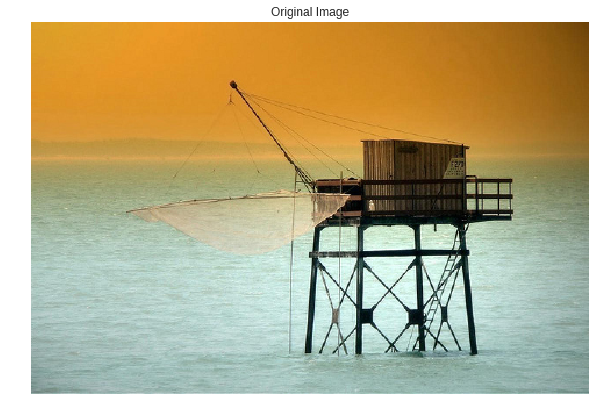

In [4]:
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(input_image)
plt.title('Original Image')

Text(0.5,1,'SIFT features')

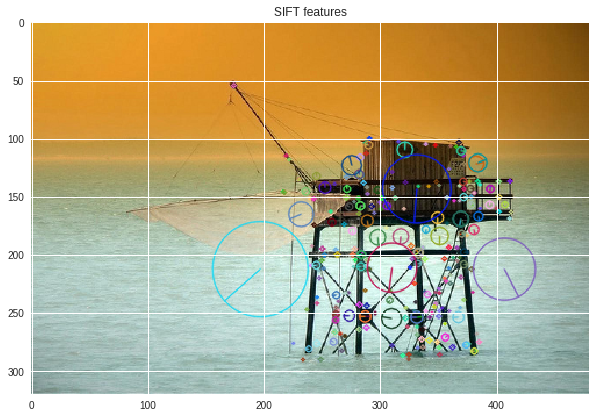

In [5]:
sift = cv2.xfeatures2d.SIFT_create() 
keypoints = sift.detect(gray_image, None)

plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image, 
                  keypoints, 
                  input_image,
                  flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(input_image)
plt.title('SIFT features')

The size of the circle indicates the strength of the keypoints, and the line inside the
circle indicates the orientation.

We can also compute the descriptors:

In [0]:
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

#Speeded-up robust features (SURF)
Even though SIFT is nice and useful, it's computationally intensive. This means that it's
slow and we will have a hard time implementing a real-time system if it uses SIFT. We need
a system that's fast and has all the advantages of SIFT.

SURF uses a simple box filter to approximate the Gaussian. The good thing is that this is
really easy to compute and it's reasonably fast.

Text(0.5,1,'SURF features')

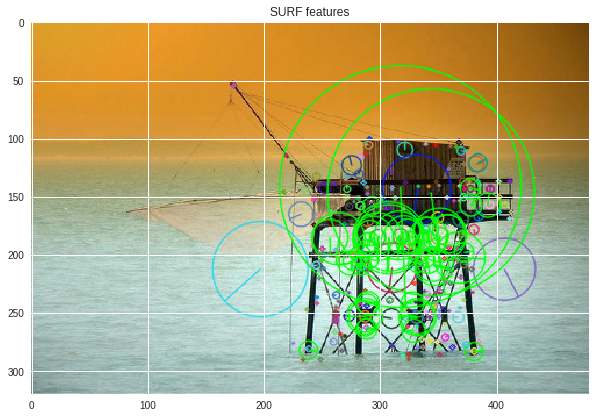

In [7]:
surf = cv2.xfeatures2d.SURF_create()

# This threshold controls the number of keypoints
surf.setHessianThreshold(15000)

keypoints, descriptors = surf.detectAndCompute(gray_image, None)

plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image, 
                  keypoints, 
                  input_image, 
                  color=(0,255,0),
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(input_image)
plt.title('SURF features')

#Features from accelerated segment test (FAST)
Neither SURF or SIFT is fast enough for a real-time system. When building a real-time application on a mobile device, we need something that is really fast and computationally inexpensive.

Instead of going through all the expensive calculations, the FAST algorithm quickly determines if the current point is a potential keypoint. Note that FAST is just for keypoint detection. Once keypoints are detected, we need to use SIFT or SURF to compute the descriptors. 

Text(0.5,1,'Input Image')

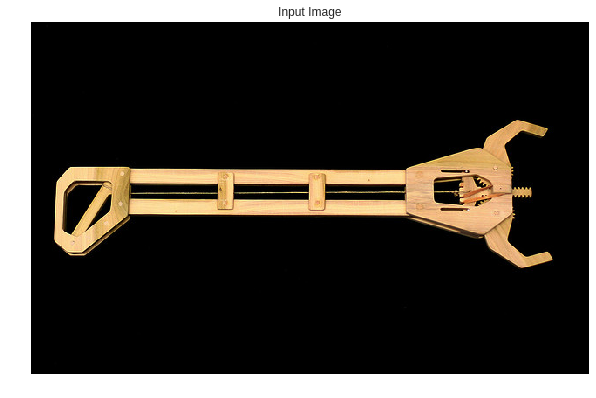

In [8]:
input_image = cv2.imread('tool.png')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(input_image)
plt.axis('off')
plt.title('Input Image')

In [9]:
fast = cv2.FastFeatureDetector_create()

# detect keypoints
keypoints = fast.detect(gray_image, None)
print('Number of keypoints with non-max suppression: ', len(keypoints))

Number of keypoints with non-max suppression:  847


(-0.5, 639.5, 403.5, -0.5)

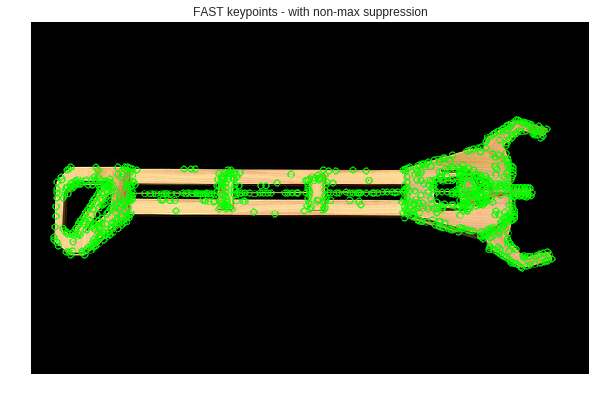

In [10]:
# draw keypoints on top of the input image
img_keypoints_with_nonmax = input_image.copy()
plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image,
                  keypoints,
                  img_keypoints_with_nonmax,
                  color=(0,255,0),
                  flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_keypoints_with_nonmax)
plt.title('FAST keypoints - with non-max suppression')
plt.axis('off')

In [12]:
# disable non-max suppression
fast.setNonmaxSuppression(False)
# detect keypoints again
keypoints = fast.detect(gray_image, None)
print('Total keypoints without non-max suppression: ', len(keypoints))

Total keypoints without non-max suppression:  3132


(-0.5, 639.5, 403.5, -0.5)

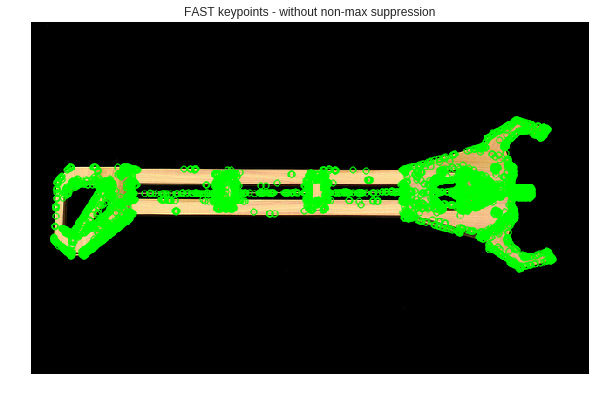

In [13]:
# draw keypoints on top of the input image
img_keypoints_without_nonmax = input_image.copy()
plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image, 
                  keypoints, 
                  img_keypoints_without_nonmax, 
                  color=(0,255,0), 
                  flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.imshow(img_keypoints_without_nonmax)
plt.title('FAST keypoints - without non-max suppression')
plt.axis('off')

Thus, you may want to set `setNonmaxSuppression` to `True` to clearn up and suppress the unimportant keypoints

#Binary robust independent elementary features (BRIEF)
FAST can be used to quickly detect the keypoints. BRIEF is a quick way to compute the descriptors once FAST is done instead of using SIFT or SURF.

BRIEF is a method for extracting feature
descriptors. It cannot detect the keypoints by itself, so we need to use it in conjunction with
a keypoint detector. The good thing about BRIEF is that it's compact and fast.

Let's combine the powers of FAST and BRIEF

Text(0.5,1,'Input Image')

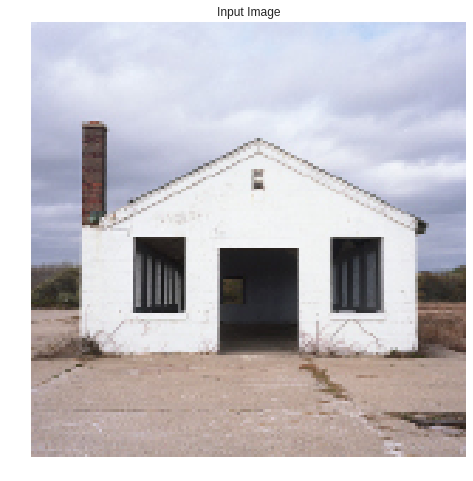

In [16]:
input_image = cv2.imread('house.jpg') 
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,8))
plt.imshow(input_image)
plt.axis('off')
plt.title('Input Image')

In [0]:
# FAST detector
fast = cv2.FastFeatureDetector_create()

# BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with FAST
keypoints_fast = fast.detect(gray_image, None)

# compute the descriptors with BRIEF
keypoints_brief, descriptors = brief.compute(gray_image, keypoints_fast)

(-0.5, 153.5, 153.5, -0.5)

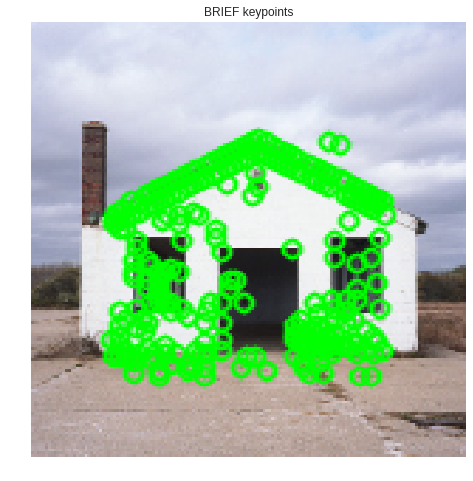

In [20]:
plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image,
                  keypoints_brief,
                  input_image,
                  color=(0,255,0))
plt.imshow(input_image)
plt.title('BRIEF keypoints')
plt.axis('off')

(-0.5, 153.5, 153.5, -0.5)

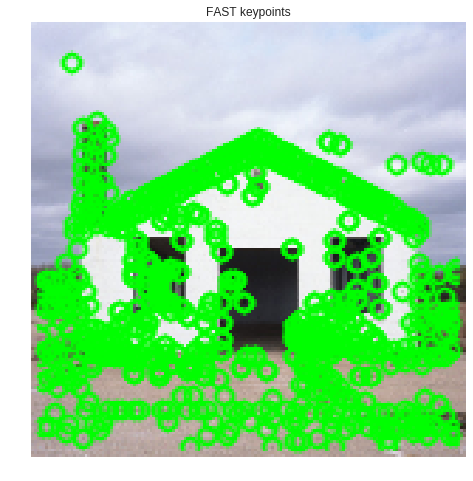

In [22]:
plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image,
                  keypoints_fast,
                  input_image,
                  color=(0,255,0))
plt.imshow(input_image)
plt.title('FAST keypoints')
plt.axis('off')

#Oriented FAST and Rotated BRIEF (ORB)


In [0]:
input_image = cv2.imread('fishing_house.jpg') 
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) 
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# ORB 
orb = cv2.ORB_create()

# find keypoints
keypoints = orb.detect(gray_image, None)

# compute descriptors
keypoints, descriptors = orb.compute(gray_image, keypoints)

(-0.5, 479.5, 319.5, -0.5)

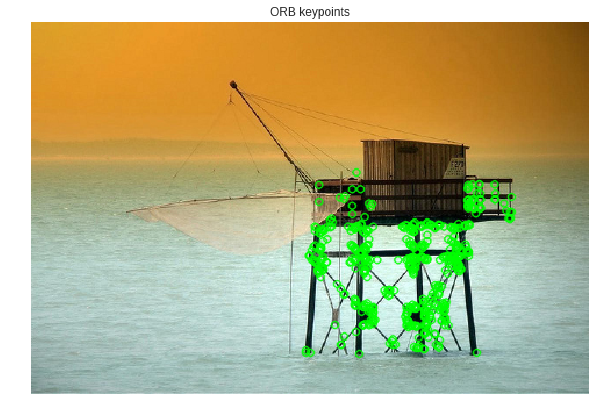

In [24]:
plt.figure(figsize=(10,8))
cv2.drawKeypoints(input_image,
                  keypoints,
                  input_image,
                  color=(0,255,0))
plt.imshow(input_image)
plt.title('ORB keypoints')
plt.axis('off')